In [1]:
import pandas as pd
from IPython.display import display, Markdown
from trend_analysis import (
    load_data,
    cluster_topics,
    get_top_terms_per_cluster,
    plot_trends_over_time,
    name_and_describe_clusters,
    merge_similar_clusters
)


c:\Users\nicol\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Topic 0 
 **Keywords**: loveit, iloveit, trentpr, miranda, shesobambi, averagesouthernmom, treehutpe, treehutor, bchonaiew, ooooo 
  
 **Name**: Loveit / Iloveit 


### Topic 197 
 **Keywords**: love, sandymitchell, pr, smellssogood, treehitpr, queenbng, lovethisstuff, kellisouthern, judyjude, haxanthewanderer 
  
 **Name**: Love / Sandymitchell 


### Topic 1 
 **Keywords**: treehutor, zicoxuality, yesssss, yessss, budgetsorceress, brooklynnnnn, briellegulley, bchonaiew, barbaraschelda, bambitimmermans 
  
 **Name**: Treehutor / Zicoxuality 


### Topic 21 
 **Keywords**: trentpr, yesssss, yessss, budgetsorceress, brooklynnnnn, briellegulley, bchonaiew, barbaraschelda, bambitimmermans, awesome 
  
 **Name**: Trentpr / Yesssss 


### Topic 493 
 **Keywords**: treebutpr, raisingchaos, ramirorsalazar, treepr, brooklynnnnn, shesobambi, jonisphotos, yesssss, yessss, budgetsorceress 
  
 **Name**: Treebutpr / Raisingchaos 


### Topic 86 
 **Keywords**: myfavorite, simplyfoodiegal, lovetreehut, lovethis, foundthemall, colleenstevenson, brooklynnnnn, briellegulley, bchonaiew, barbaraschelda 
  
 **Name**: Myfavorite / Simplyfoodiegal 


### Topic 150 
 **Keywords**: lovethis, yesssss, yessss, budgetsorceress, brooklynnnnn, briellegulley, bchonaiew, barbaraschelda, bambitimmermans, awesome 
  
 **Name**: Lovethis / Yesssss 


### Topic 421 
 **Keywords**: budgetsorceress, ndnmomma, oneofmyfavorites, jennafer, heidibenner, greatstuff, trentpr, briellegulley, bchonaiew, barbaraschelda 
  
 **Name**: Budgetsorceress / Ndnmomma 


### Topic 204 
 **Keywords**: treehutprplease, tivavialpando, queenbng, myfavorite, kyliecox, jennafer, yessss, budgetsorceress, brooklynnnnn, briellegulley 
  
 **Name**: Treehutprplease / Tivavialpando 


### Topic 53 
 **Keywords**: smacalexx, sopretty, oooooo, jessi, whoisannaa, yessss, budgetsorceress, brooklynnnnn, briellegulley, bchonaiew 
  
 **Name**: Smacalexx / Sopretty 


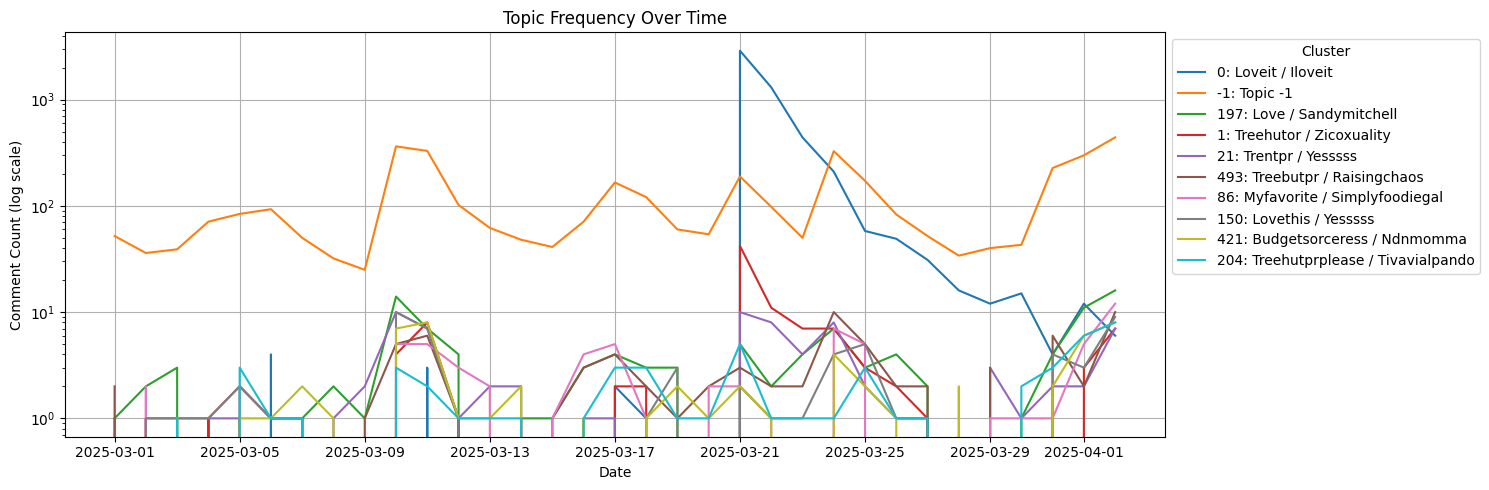

In [2]:
# Step 1: Load and preprocess data
df = load_data("engagements.csv")

# Step 2: Cluster topics using DBSCAN + TSNE
df, clusterer, tfidf = cluster_topics(df, 'comment_text')

# Step 3: Generate TF-IDF matrix for keyword extraction and merging
tfidf_matrix = tfidf.transform(df['clean_text'])

# Step 4: Merge similar clusters by vector similarity
df['cluster'] = merge_similar_clusters(tfidf_matrix, df['cluster'].values)

# Step 5: Extract top keywords from most frequent clusters
keywords = get_top_terms_per_cluster(
    tfidf_matrix,
    df['cluster'].values,
    tfidf,
    max_clusters=10,
    banned_words=["treehut", "treehutpr", "official"]
)


# Step 6: Heuristically generate topic names and summaries
summaries, names = name_and_describe_clusters(keywords)

# Step 7: Display summaries in Markdown format
for s in summaries:
    display(Markdown(s))

# Step 8: Plot topic frequency trends over time
plot_trends_over_time(df, cluster_names=names)

In [3]:
len(df)

17812